频域匹配滤波有三种方式：

   1. 方式1的匹配滤波器：时间反褶后取复共轭，计算Nfft点补零DFT
    H1(f) = fft(conj(s(-t)),Nfft)

   2. 方式2的匹配滤波器：补零后计算Nfft点DFT，对结果取复共轭
    H2(f) = conj(fft(s(t),Nfft))

   3. 方式3的匹配滤波器：直接在频域生成匹配滤波器
    H3(f) = exp(1i*pi*f.^2/K)列表内容

滤波器的形式不对，滤波后脉冲峰值的位置也不同，方式1的脉冲在信号尾部，方式2的脉冲在信号前部，方式3的脉冲与信号零频位置对准。


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft,fftshift,ifft,ifftshift
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

In [2]:
T = 10e-6;               # % 信号持续时间
B = 15e6;                 # % 信号带宽
K = B/T;                   # % 调频率
ratio = 1.5;                # % 过采样率
Fs = ratio*B;              # % 采样频率
dt = 1/Fs;                 # % 采样间隔
Nr = int(np.ceil(T/dt));         #    % 采样点数
t = ((np.arange(Nr))-Nr/2)/Nr*T;     # % 时间轴flipud

st0 = np.exp(1j*np.pi*K*(t-T/5)**2);    # % 基本信号
space1 = np.zeros(int(np.round(Nr/5))) # % 生成空信号
space2 = np.zeros(Nr) # % 生成空信号
st = np.concatenate((space1,st0,space2,st0,space2,st0,space1), axis=None) #实际信号
N = st.size          #实际信号长度
n = np.arange(0,N,1)
f = (n-N/2)/N*Fs


In [3]:
Sf = fft(st);           #    % FFT
Hf = np.exp(1j*np.pi*f**2/K);  #   % 频域匹配滤波器

Out = Sf*Hf;             #  % 频域匹配滤波

Sf = fftshift(fft(st));        #                 % 实际信号的傅里叶变换
Hf1 = fftshift(fft(np.conj(np.flipud(st0)),N));  #     % 方式1的匹配滤波器：时间反褶后取复共轭，计算N点补零DFT
Hf2 = fftshift(np.conj(fft(st0,N)));          #     % 方式2的匹配滤波器：补零后计算DFT，对结果取复共轭
Hf3 = np.exp(1j*np.pi*f**2/K);                       # % 方式3的匹配滤波器：直接在频域生成匹配滤波器

out1 = ifft(ifftshift(Sf*Hf1));
out2 = ifft(ifftshift(Sf*Hf2));
out3 = ifft(ifftshift(Sf*Hf3));


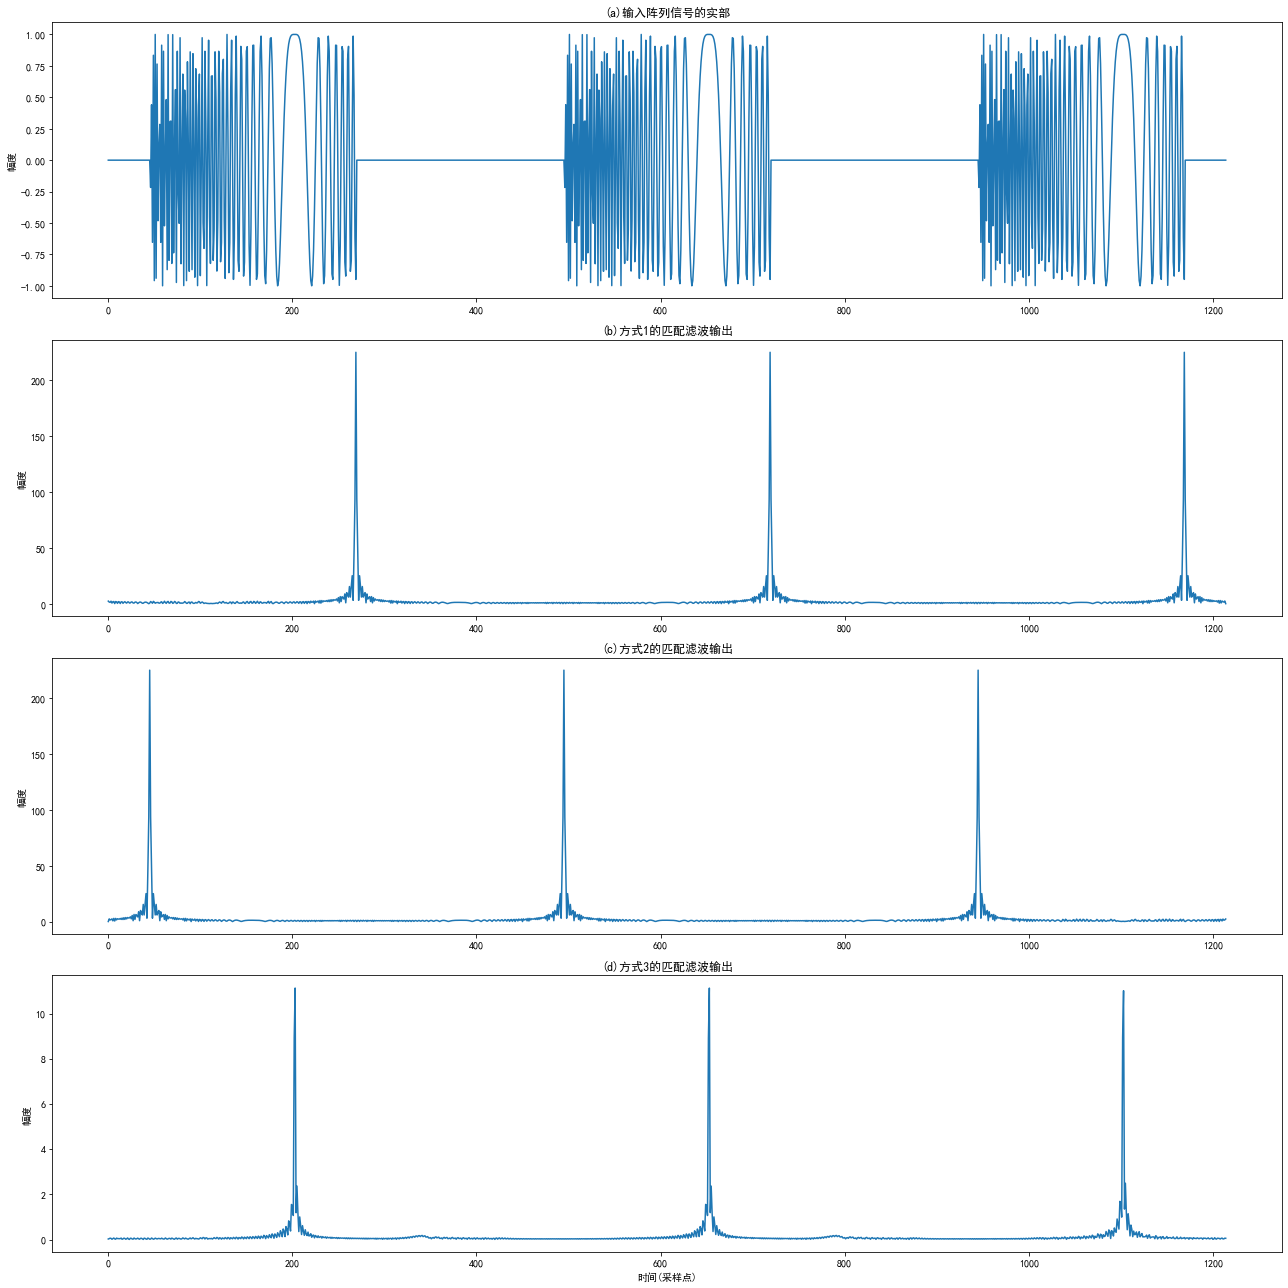

In [4]:
fig = plt.figure(figsize=(18,18))#set(gcf,'Color','w');
plt.subplot(4,1,1)
plt.plot(n,np.real(st));
plt.title('时域窗函数');plt.ylabel('幅度');

plt.title('(a)输入阵列信号的实部');plt.ylabel('幅度');
plt.subplot(4,1,2);plt.plot(n,np.abs(out1))#;axis tight
plt.title('(b)方式1的匹配滤波输出');plt.ylabel('幅度');
plt.subplot(4,1,3);plt.plot(n,np.abs(out2))#;axis tight
plt.title('(c)方式2的匹配滤波输出');plt.ylabel('幅度');
plt.subplot(4,1,4);plt.plot(n,np.abs(out3))#;axis tight
plt.title('(d)方式3的匹配滤波输出');plt.xlabel('时间(采样点)');plt.ylabel('幅度');
fig.tight_layout()